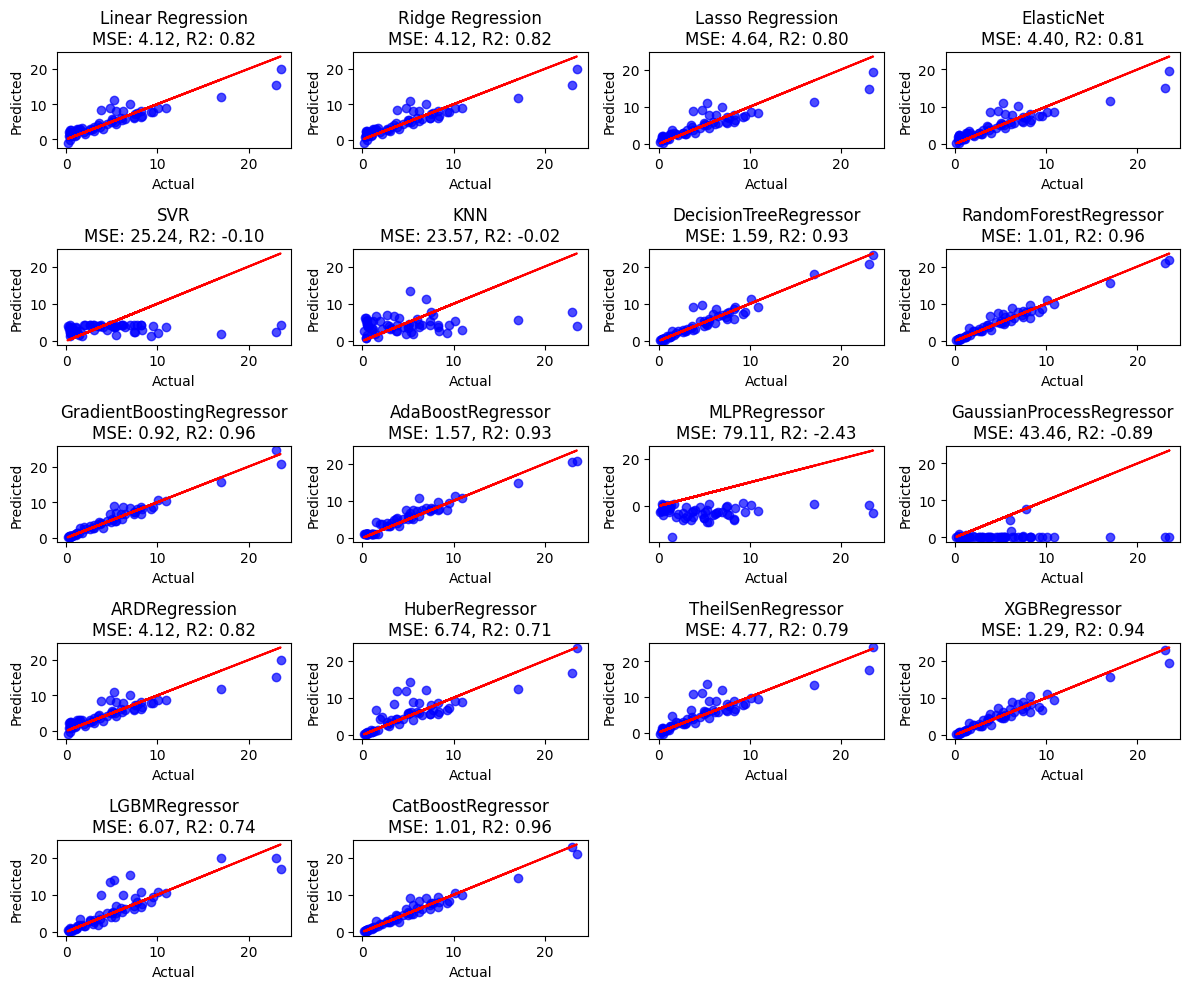

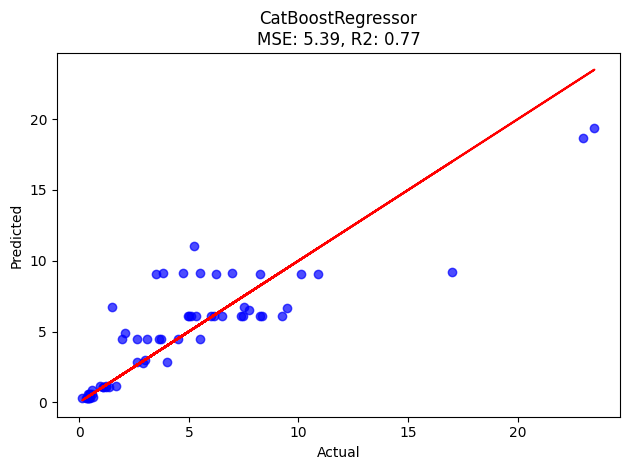

--------------------------------------------------------------------------------


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import ARDRegression, HuberRegressor, TheilSenRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import shutil

# Get the width of the terminal window
terminal_width = shutil.get_terminal_size().columns

# Print a line of dashes '-' across the width of the terminal


# Load the dataset
df = pd.read_csv('/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv')

# Feature engineering: Calculating car age
df['Car_age'] = 2023 - df['Year']

# Selecting features and target variable
X = df[['Present_Price', 'Kms_Driven', 'Owner', 'Car_age']]
y = df['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit different regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'MLPRegressor': MLPRegressor(),
    'GaussianProcessRegressor': GaussianProcessRegressor(),
    'ARDRegression': ARDRegression(),
    'HuberRegressor': HuberRegressor(),
    'TheilSenRegressor': TheilSenRegressor(),
    # IsotonicRegression is excluded due to its specific input requirements
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'CatBoostRegressor': CatBoostRegressor(silent=True)
}

plt.figure(figsize=(12, 10))

for idx, (name, regressor) in enumerate(regressors.items(), 1):
    plt.subplot(5, 4, idx)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    with open(f"{name}","wb") as f:
        pickle.dump(regressor,f)
    
    
    
    
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot(y_test, y_test, color='red')  # Plotting the ideal prediction line
    
    plt.title(f"{name}\nMSE: {mse:.2f}, R2: {r2:.2f}")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.tight_layout()


plt.show()
X_train, X_test, y_train, y_test = train_test_split(X['Present_Price'], y, test_size=0.2, random_state=42)

# Initialize and fit Isotonic Regression on a single feature
regressor = IsotonicRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot(y_test, y_test, color='red')  # Plotting the ideal prediction line
plt.title(f"{name}\nMSE: {mse:.2f}, R2: {r2:.2f}")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()

plt.show()
print('-' * terminal_width)
